In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.076508,95.309998,97.220001,93.940002,95.540001,26452900
2757,2022-12-15,90.976570,91.199997,94.029999,90.430000,93.540001,28298800
2758,2022-12-16,90.637413,90.860001,91.750000,90.010002,91.199997,48485500


In [6]:
ma_100_days = data.Close.rolling(100).mean()

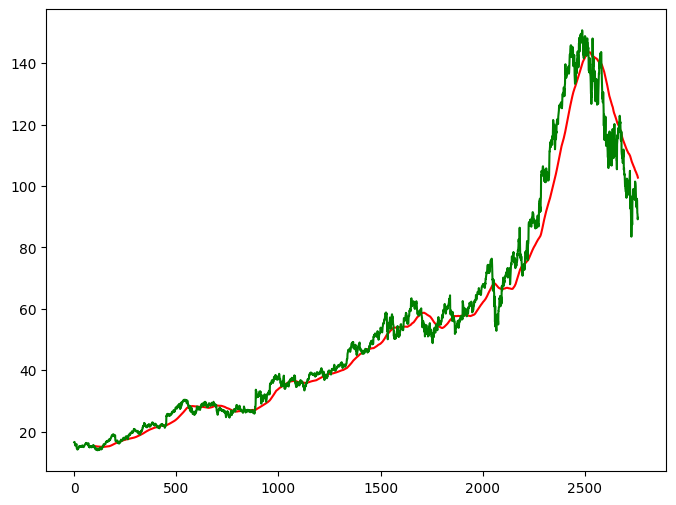

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

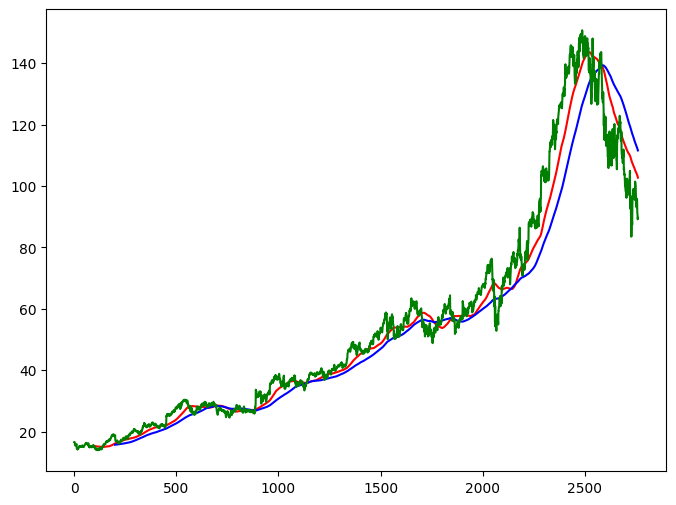

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2208

In [14]:
data_train

Ticker,GOOG
0,16.573130
1,16.644611
2,16.413727
3,16.189817
4,15.503389
...,...
2203,74.301003
2204,72.671997
2205,73.014503
2206,74.296501


In [15]:
data_test

Ticker,GOOG
2208,78.457497
2209,78.584000
2210,78.403999
2211,77.956497
2212,78.650497
...,...
2756,95.309998
2757,91.199997
2758,90.860001
2759,89.150002


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [20]:
x, y = np.array(x), np.array(y)
x,y

(array([[[0.03654398],
         [0.03753007],
         [0.03434501],
         ...,
         [0.01434479],
         [0.01732025],
         [0.01532745]],
 
        [[0.03753007],
         [0.03434501],
         [0.03125618],
         ...,
         [0.01732025],
         [0.01532745],
         [0.01115973]],
 
        [[0.03434501],
         [0.03125618],
         [0.02178689],
         ...,
         [0.01532745],
         [0.01115973],
         [0.01212521]],
 
        ...,
 
        [[0.75507635],
         [0.76249115],
         [0.75527979],
         ...,
         [0.81386378],
         [0.83290097],
         [0.81042881]],
 
        [[0.76249115],
         [0.75527979],
         [0.77820367],
         ...,
         [0.83290097],
         [0.81042881],
         [0.8151537 ]],
 
        [[0.75527979],
         [0.77820367],
         [0.77549986],
         ...,
         [0.81042881],
         [0.8151537 ],
         [0.83283888]]]),
 array([0.01115973, 0.01212521, 0.01002589, ..., 0.8151

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\khadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - loss: 0.0701
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0058
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0056
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0054
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0043
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0048
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0051
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0044
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0039
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0045
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.0033
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0034
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 0.0041
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0036
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - l

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

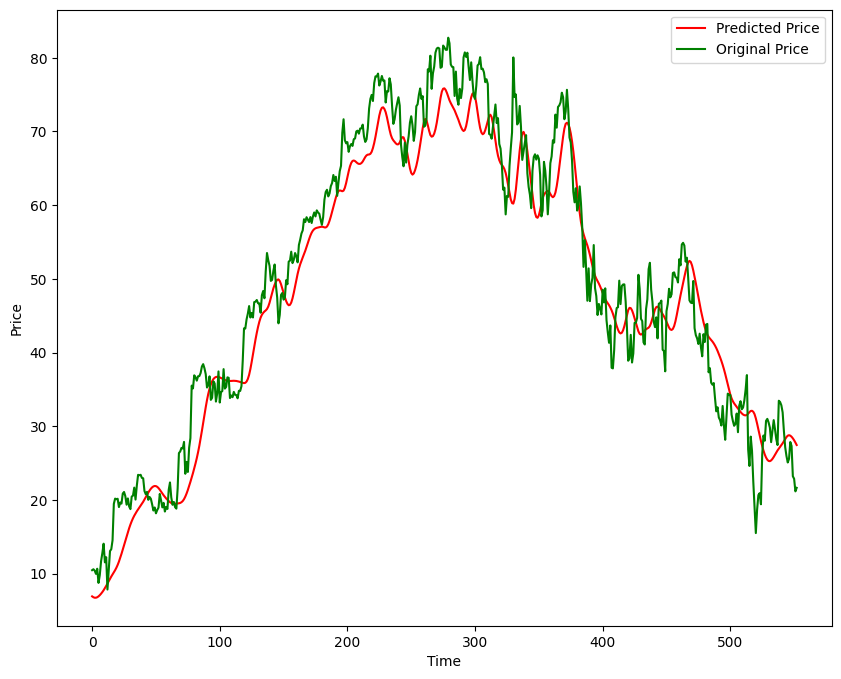

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('Stock Predictions Model.keras')